LDA/ Normal Discriminant Analysis / Discriminant Function Analysis is a dimensionality reduction technique that is commonly used for supervised classification problem.

It is used for modelling differences in groups separating two or more classes. It projects the features in higher dimension space into a lower dimension space.

LDA uses these two criterias to create a new axis:
* Maximizes the distance between means of the two classes
* Minimizes the varriation within each class

LDA fails when the mean of the distribution among the classes are shared. It becomes impossible for LDA to find a new axis that makes both the classes linearly separable. In such cases we use non-linear discriminant analysis.

In [23]:
# Implementation of LDA on Iris dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# read data from url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cls = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

dataset = pd.read_csv(url, names = cls)

dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
# divide the data into dependent and independent variables
X = dataset.drop('Class', axis = 1)
y = dataset['Class']

In [25]:
# Preprocess the dataset and split into training and test dataset
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)


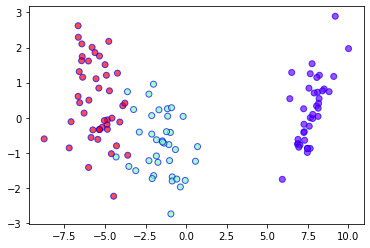

In [26]:
# apply the lda on train and test data
lda = LinearDiscriminantAnalysis(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# plot the scatterplot
plt.scatter(
    X_train[:,0], X_train[:,1], c = y_train, cmap = 'rainbow',
    alpha = 0.7, edgecolors = 'b')

In [29]:
# classify using random forest classifier and evauate its accuracy
model = RandomForestClassifier(max_depth = 2, random_state = 0)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# evaluating the model
print("Model performance is:", accuracy_score(y_test, preds))
print(confusion_matrix(y_test, preds))

Model performance is: 1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
